
--- AdaBoost ---
Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1-Score:  0.9790
ROC AUC:   0.9944


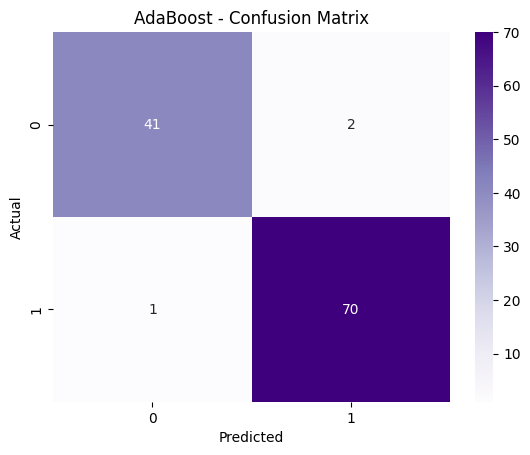


--- XGBoost ---
Accuracy:  0.9561
Precision: 0.9583
Recall:    0.9718
F1-Score:  0.9650
ROC AUC:   0.9908


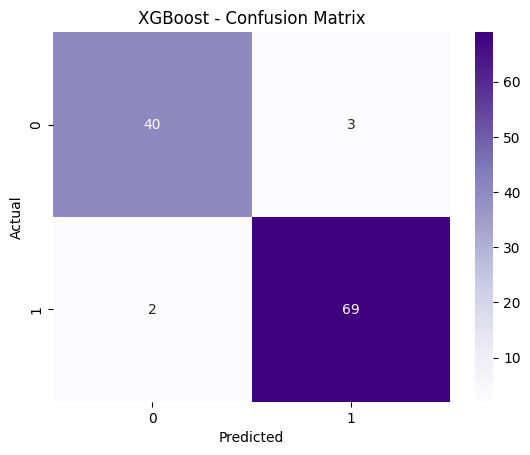

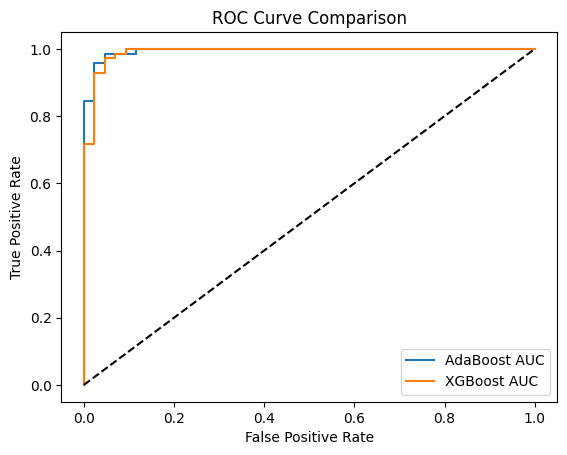

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, roc_curve)

# Load binary classification dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Train and predict
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
xgb_pred = xgb.predict(X_test)
ada_prob = ada.predict_proba(X_test)[:, 1]
xgb_prob = xgb.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n--- {name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_prob):.4f}")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model("AdaBoost", y_test, ada_pred, ada_prob)
evaluate_model("XGBoost", y_test, xgb_pred, xgb_prob)

# Plot ROC Curves
fpr1, tpr1, _ = roc_curve(y_test, ada_prob)
fpr2, tpr2, _ = roc_curve(y_test, xgb_prob)
plt.plot(fpr1, tpr1, label='AdaBoost AUC')
plt.plot(fpr2, tpr2, label='XGBoost AUC')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()